# Dimentionality Reduction

For this section, we will use UMAP for dimentionality reduction to try to visualize this dataset.

In [29]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from umap import UMAP
from sklearn.preprocessing import normalize

In [2]:
flattened_image_dir = "processed_galaxy_data/flattened_normalized_images.csv"

# load labels and flattened images
flattened_data = pd.read_csv(flattened_image_dir, header=None)
labels = pd.read_csv("processed_galaxy_data/labels_mappings_filtered.csv")

In [3]:
flattened_data.shape

(239573, 2500)

In [4]:
labels.shape

(239573, 3)

In [34]:
umap = UMAP(n_neighbors=25, min_dist=0.05)

In [35]:
embedding = umap.fit_transform(flattened_data)

In [36]:
colors = {"E":0, "S":1, "SB":2, "A":3}
labels_array = labels['shape_label'].to_numpy()
l = [sns.color_palette()[colors[x]] for x in labels_array]

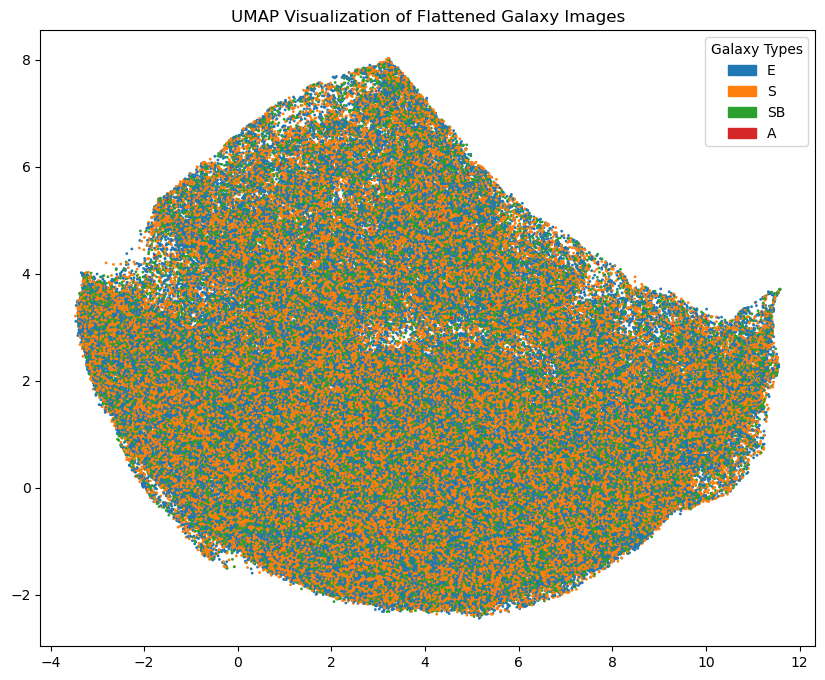

In [37]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=l, s=1)
plt.title('UMAP Visualization of Flattened Galaxy Images')

patches = [mpatches.Patch(color=sns.color_palette()[colors[t]], label=t) for t in colors]
legend = plt.legend(handles=patches, loc='upper right', title='Galaxy Types')

plt.show()

From this plot, one thing we can take notice of is that there isnt really any unqiue clusters where specific types of galaxies tend to be. 

# Reconstruction

In [38]:
def view_column(col_vec, title=None):
    plt.imshow(col_vec.reshape([50, 50], order='F'), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(title)
    plt.show()

In [47]:
flattened_data.iloc[0]

0       0.027451
1       0.019608
2       0.015686
3       0.023529
4       0.035294
          ...   
2495    0.023529
2496    0.019608
2497    0.015686
2498    0.007843
2499    0.007843
Name: 0, Length: 2500, dtype: float64

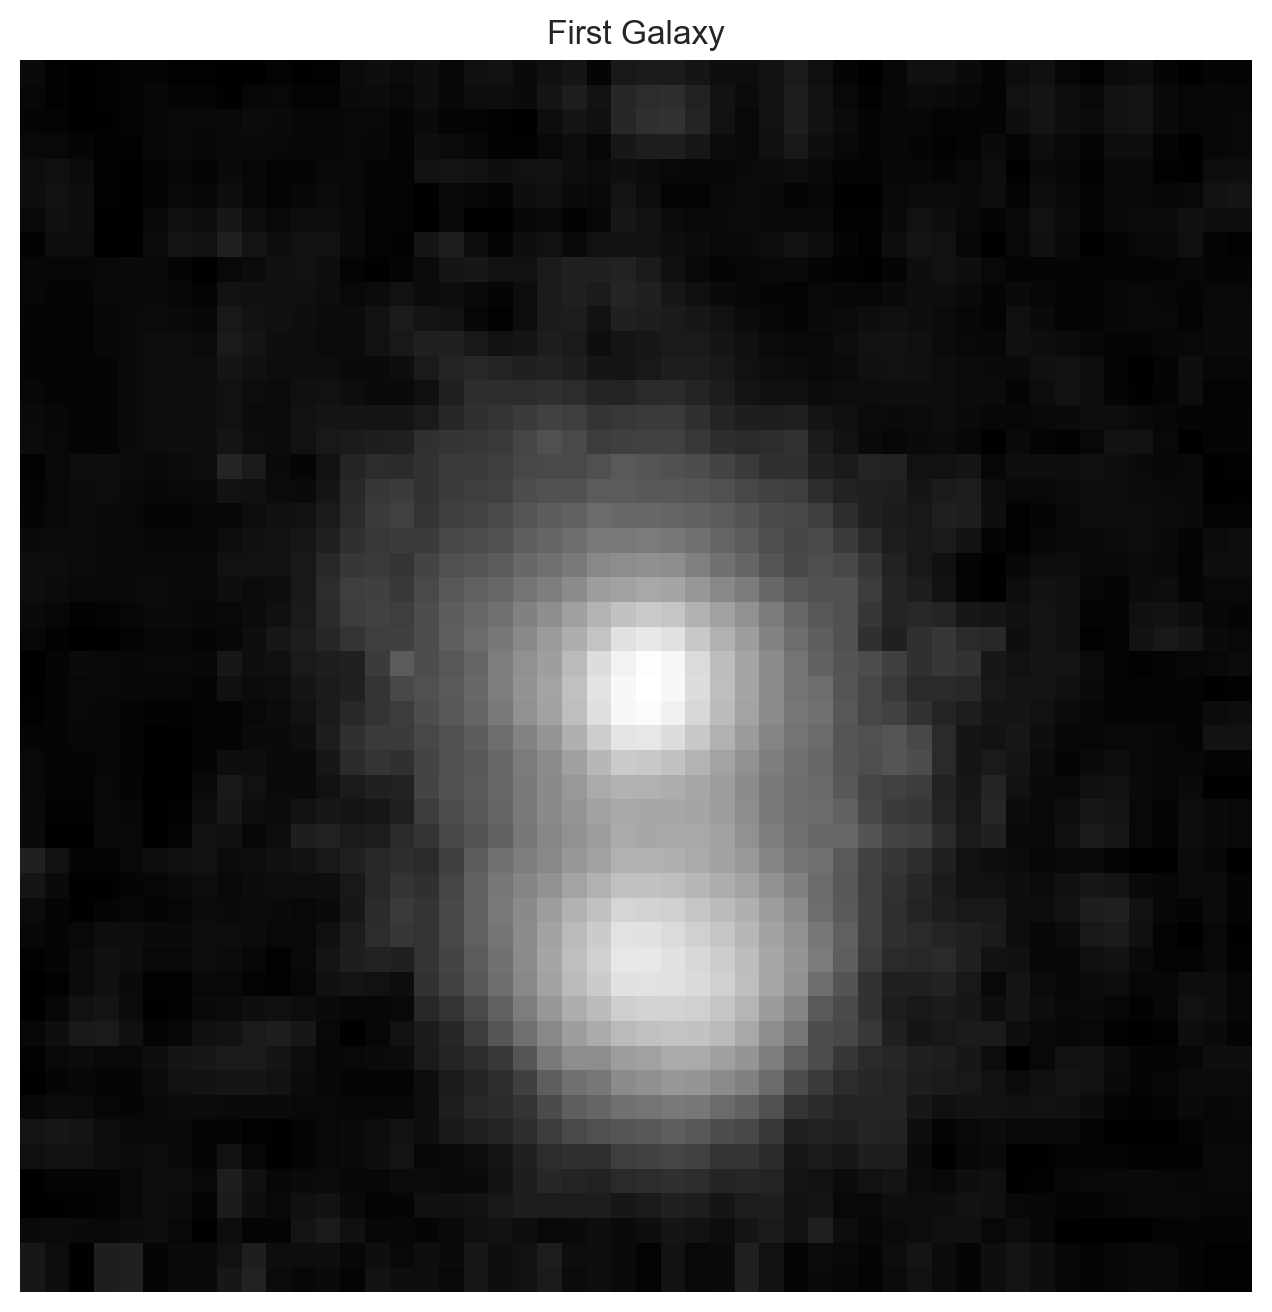

In [50]:
view_column(flattened_data.iloc[0].to_numpy(), 'First Galaxy')

In [53]:
mean_galaxy = np.mean(flattened_data, axis=0)

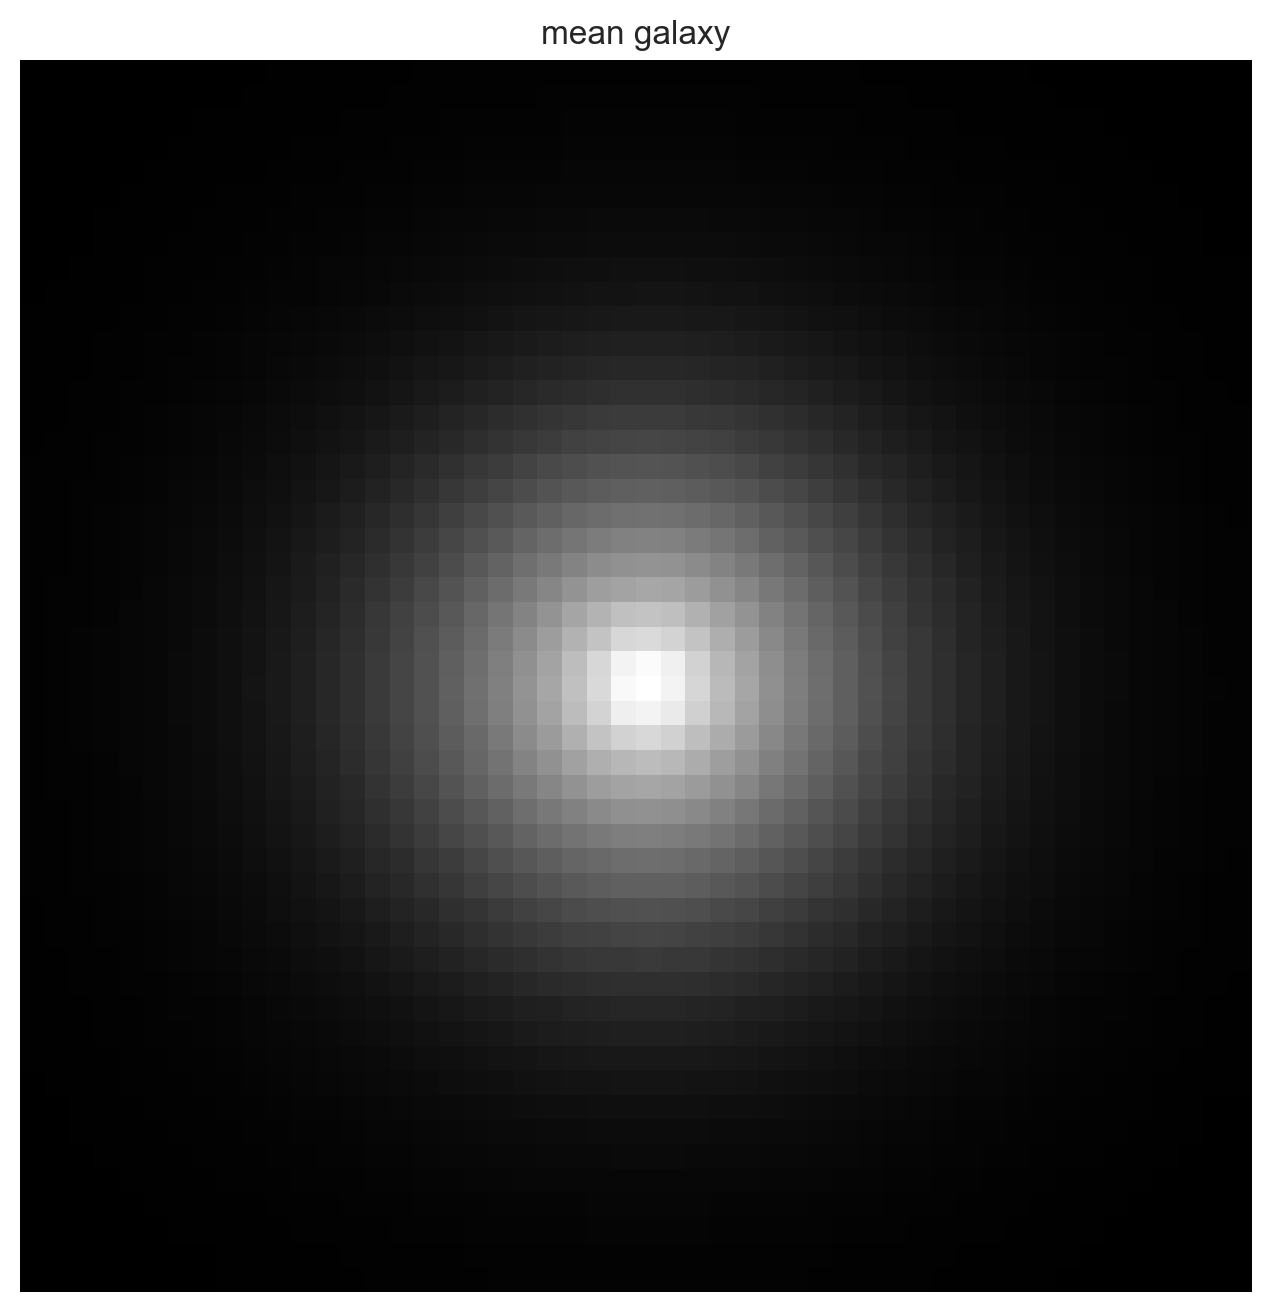

In [57]:
view_column(mean_galaxy.to_numpy(), title="mean galaxy")

(2500,)

In [62]:
A = flattened_data - mean_galaxy
eig_vals, eig_vecs = np.linalg.eigh(np.matmul(A.transpose(), A))
s = np.argsort(eig_vals)

eig_vals = eig_vals[s]
eig_vecs = eig_vecs[:,s]

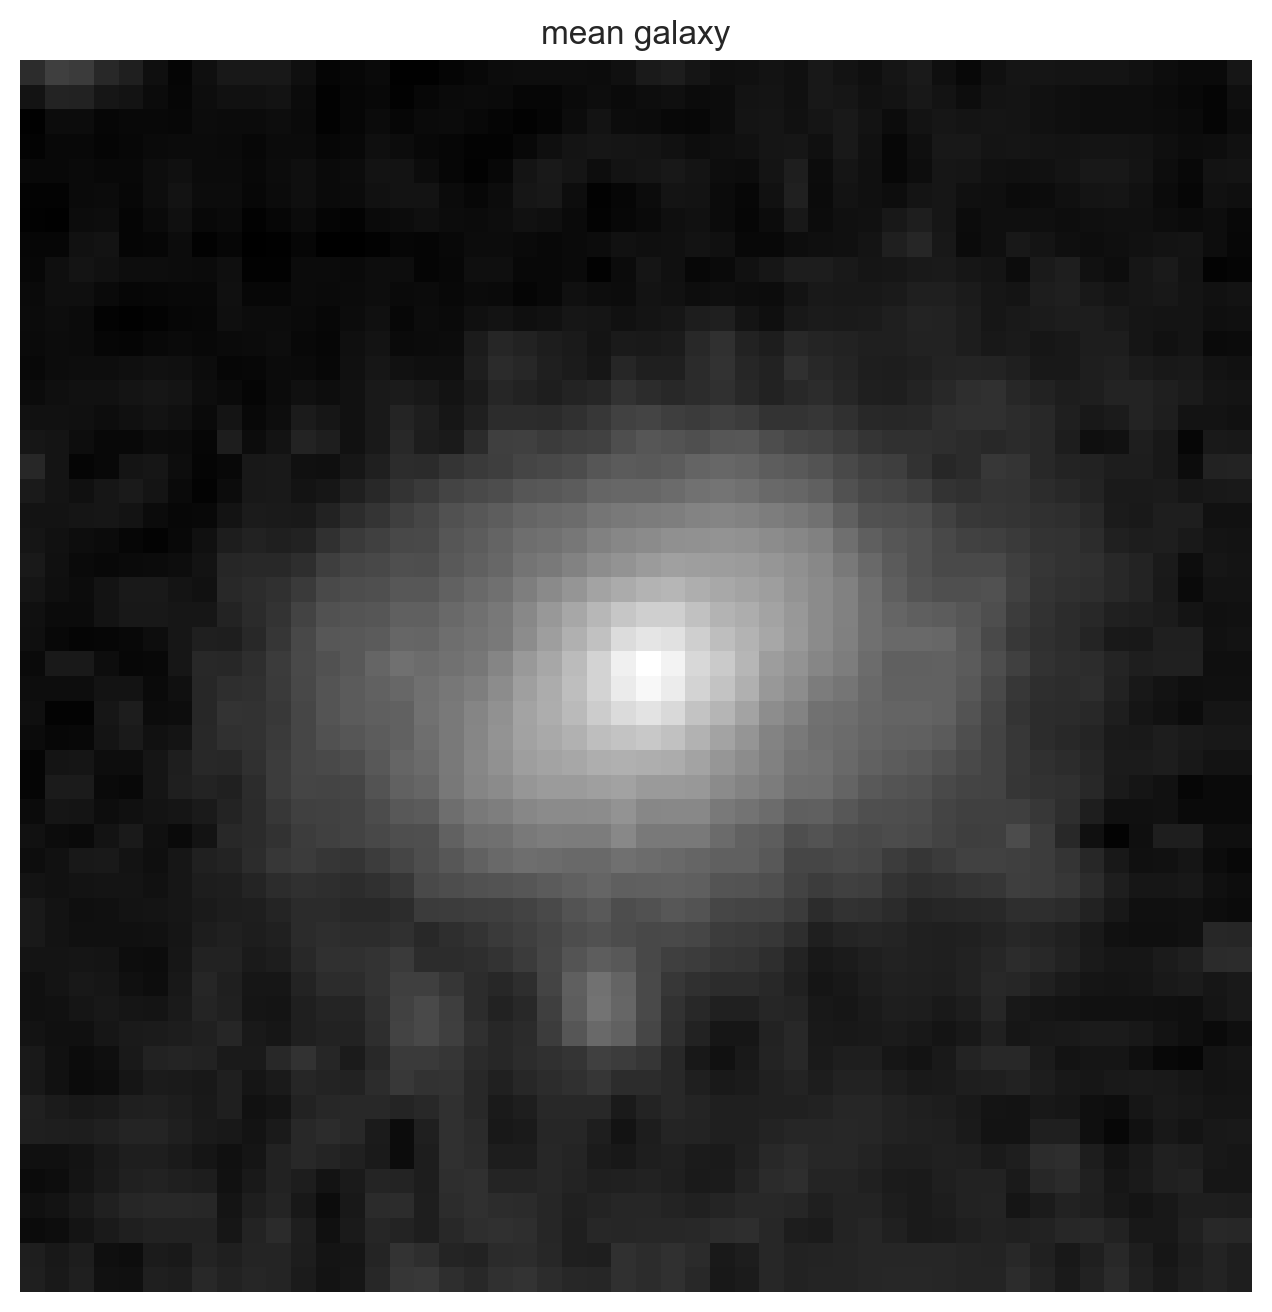

In [68]:
view_column(flattened_data.iloc[2].to_numpy(), title="mean galaxy")

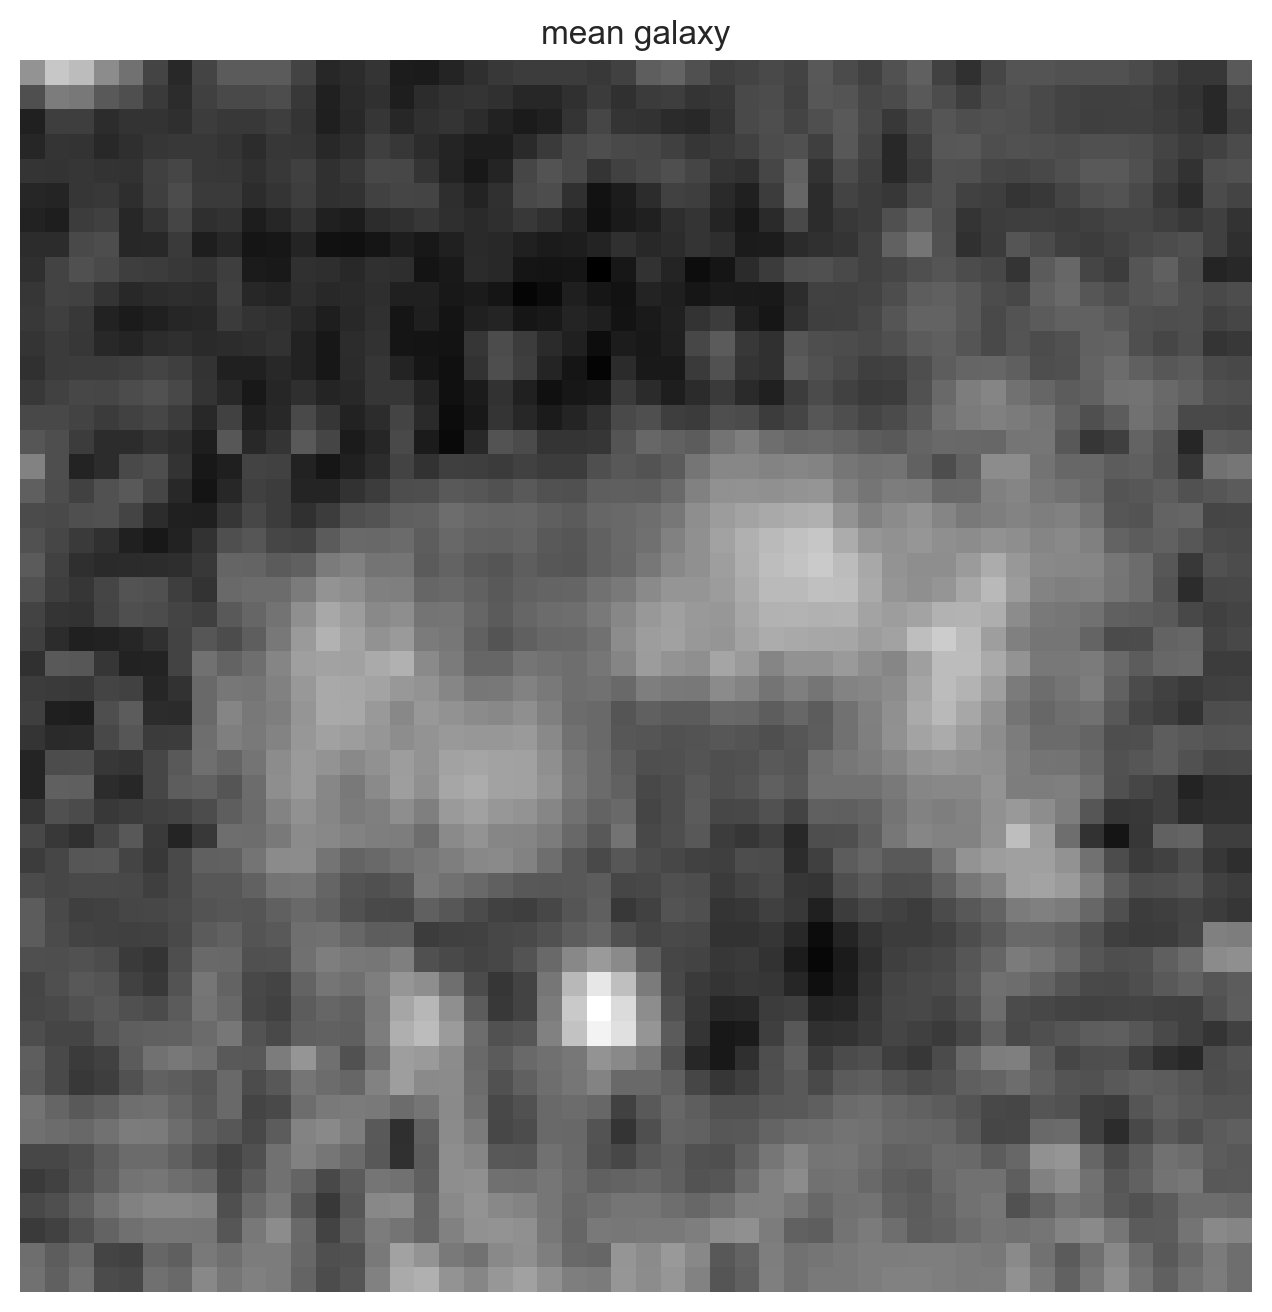

In [69]:
view_column(A.iloc[2].to_numpy(), title="mean galaxy")

In [70]:
U = np.matmul(A, eig_vecs)

In [72]:
U = normalize(U, norm='l2', axis=0)

In [159]:
c = np.dot(U, flattened_data.iloc[2])

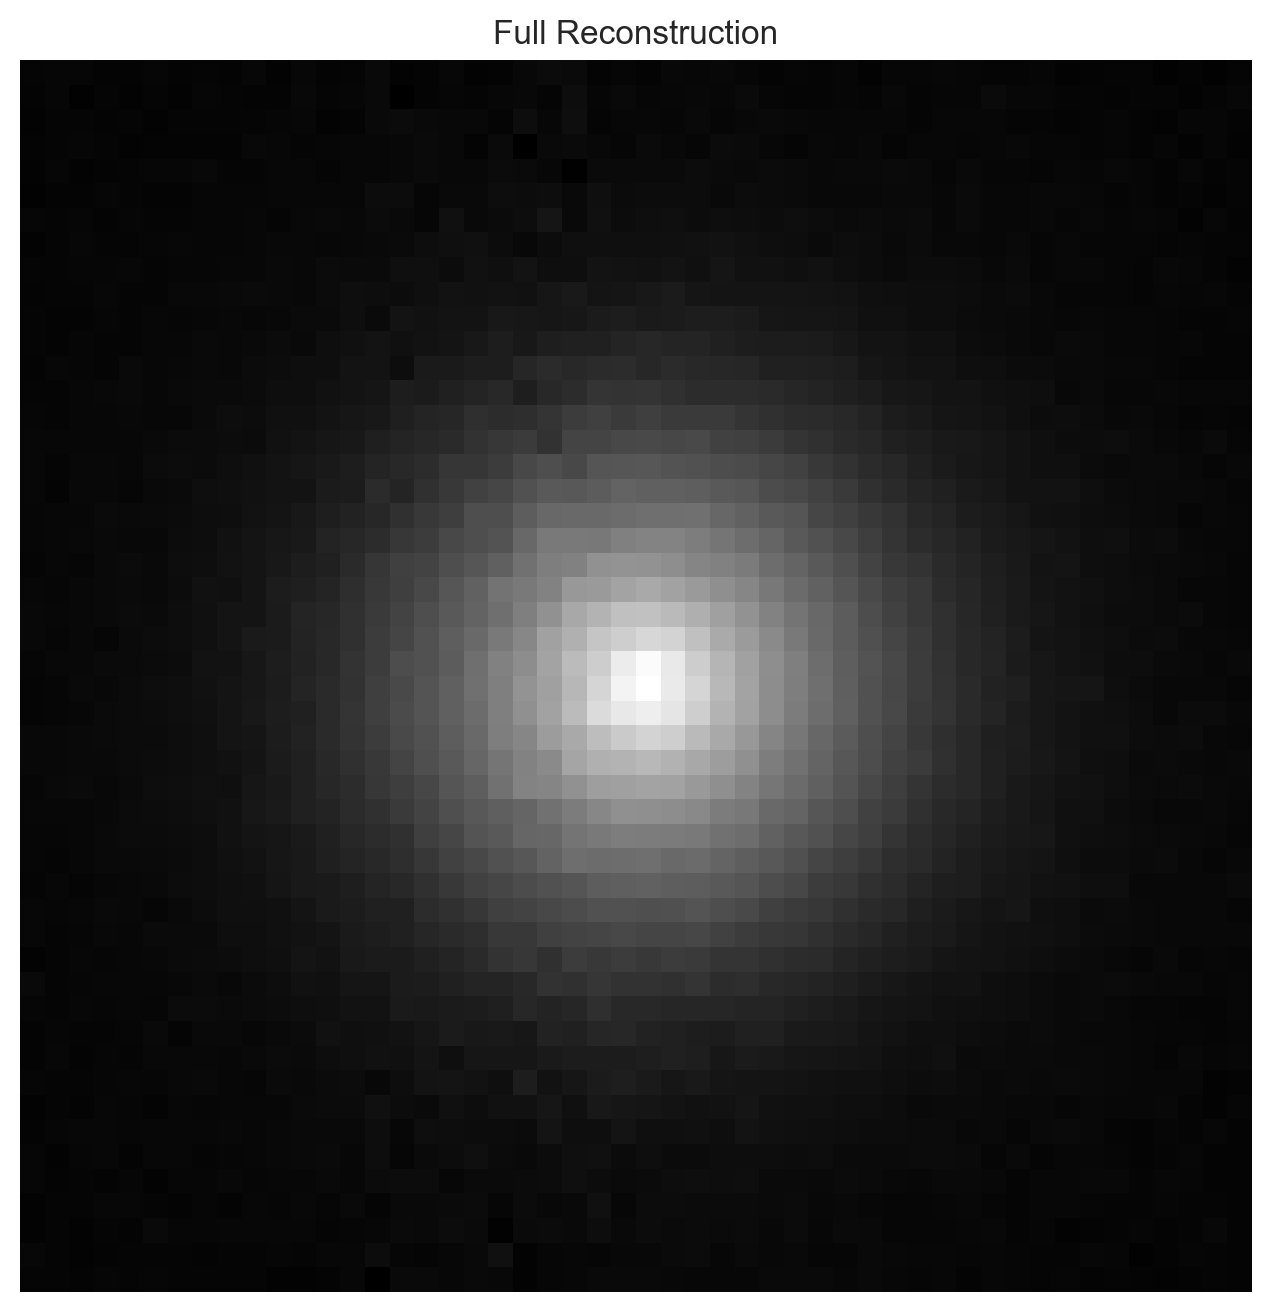

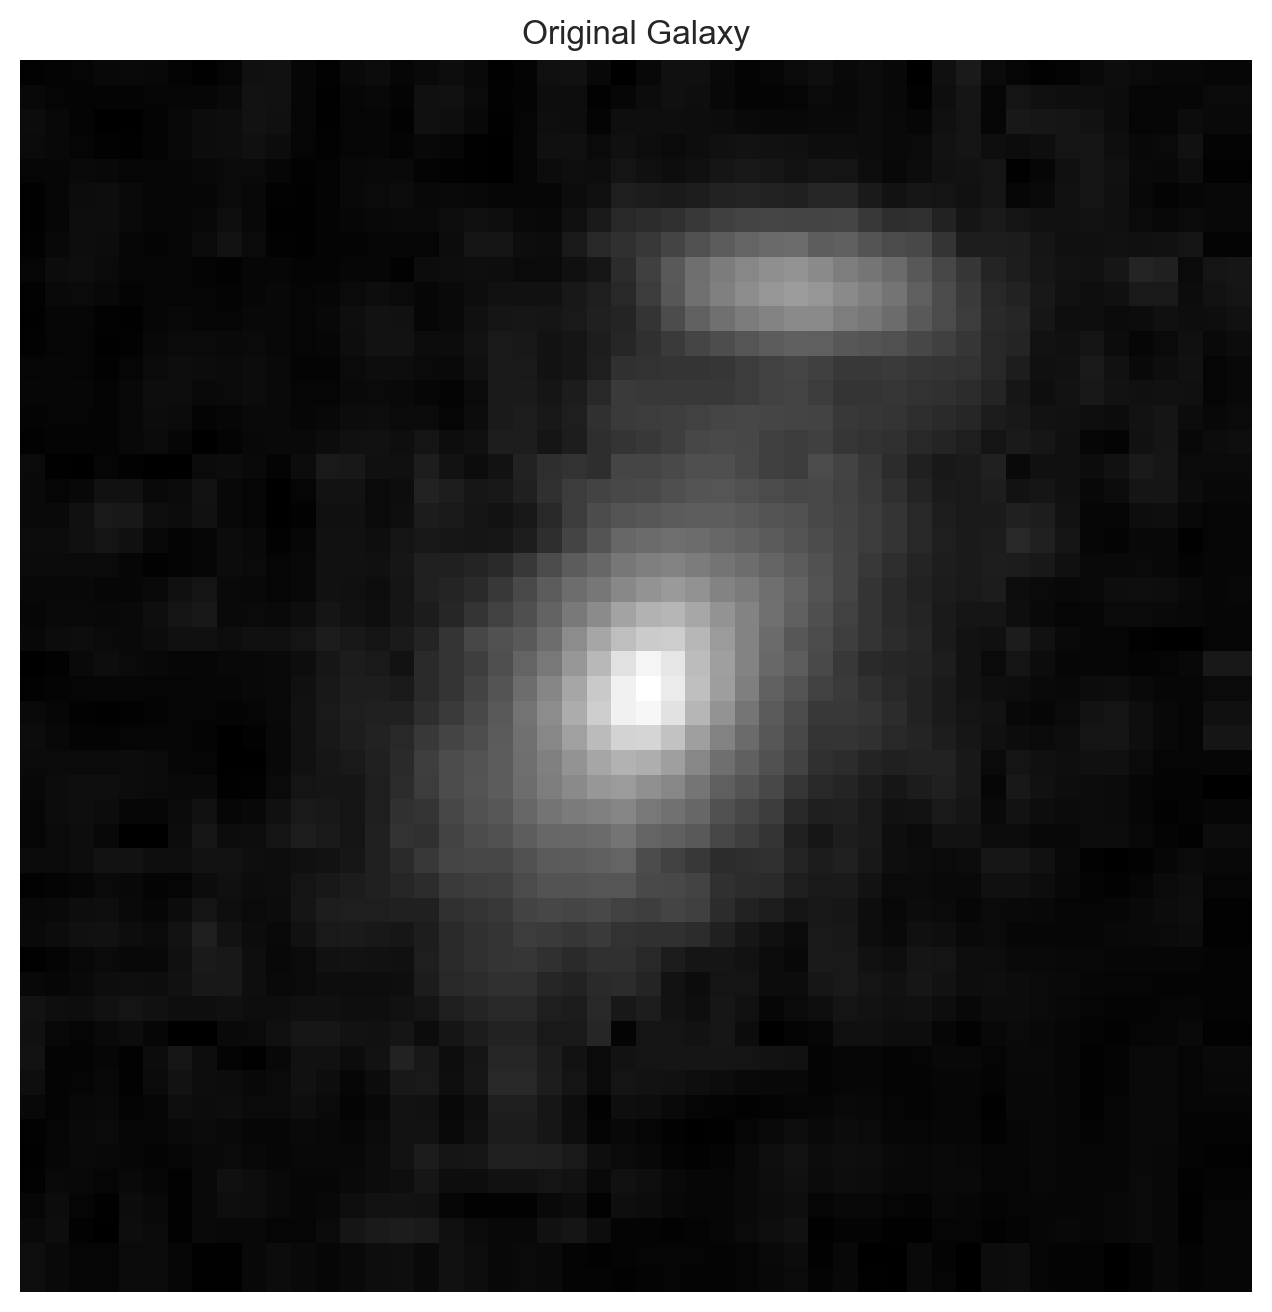

In [160]:
# Reconstruct the 5th face using all PC:
reconst_full = np.dot(U[:5000].T, c[:5000]) + mean_galaxy

# Plot the Full Reconstruction and the OG face
view_column(reconst_full.to_numpy(), "Full Reconstruction")
view_column(flattened_data.iloc[35].to_numpy(), "Original Galaxy")

In [115]:
# get 2500 random samples from the dataset
rand_ind = random_numbers = random.sample(range(flattened_data.shape[0]), 2500)

In [116]:
random_data = flattened_data.iloc[rand_ind]
random_data_labels = labels.iloc[rand_ind]

In [117]:
# reconstruct sample of 2500 using all the galaxies
reconst_data = random_data.apply(lambda x: np.dot(U.T, np.dot(U, x)) + mean_galaxy, axis=1)

In [118]:
umap = UMAP()
embedding = umap.fit_transform(reconst_data)

In [120]:
colors = {"E":0, "S":1, "SB":2, "A":3}
l = random_data_labels['shape_label'].to_numpy()
l = [sns.color_palette()[colors[x]] for x in l]

C:\Users\kianc\AppData\Local\Temp\ipykernel_1304\1100030349.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['E', 'S', 'SB', 'A'], sns.color_palette())


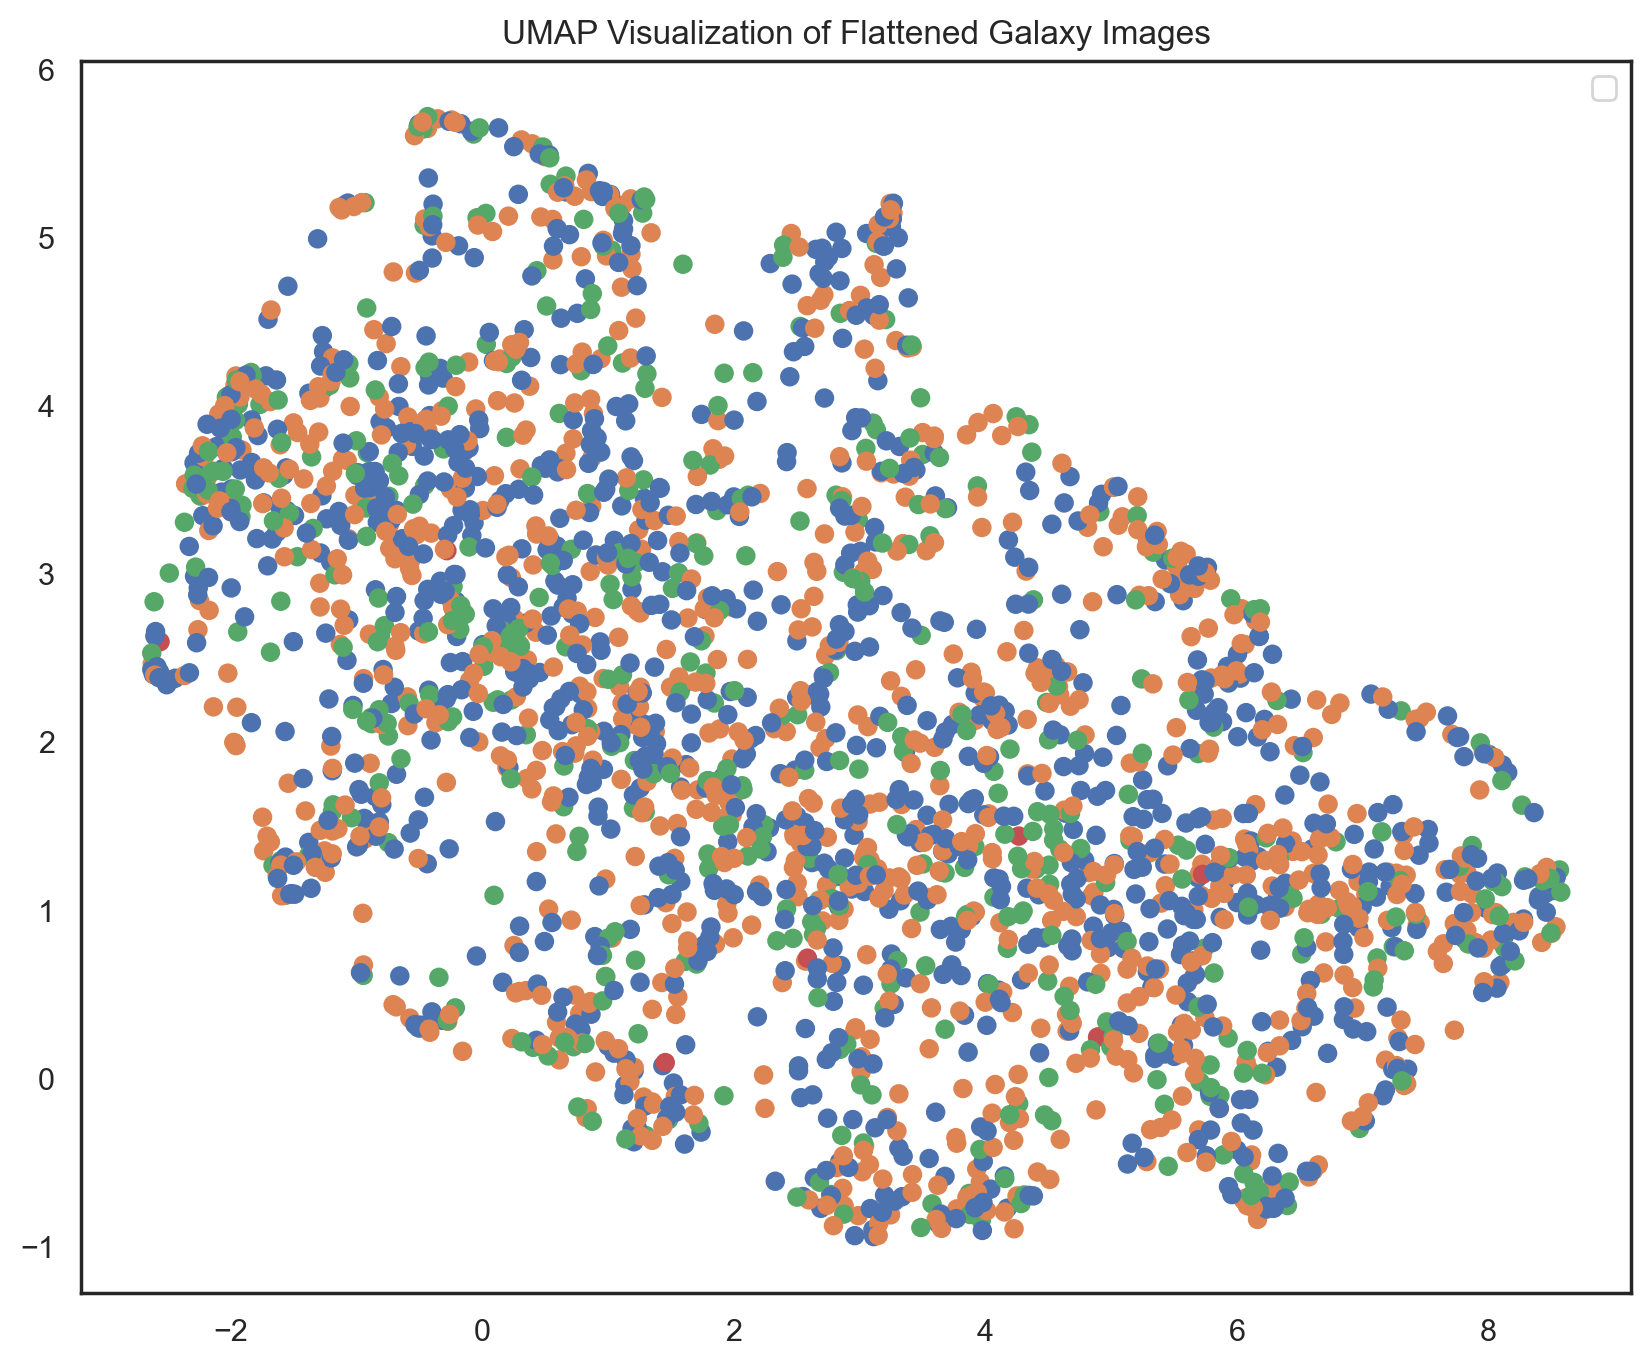

In [121]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=l)
plt.title('UMAP Visualization of Flattened Galaxy Images')
plt.legend(['E', 'S', 'SB', 'A'], sns.color_palette())
plt.show()

In [151]:
# U[:35].T
x = np.dot(U[:35].T, np.dot(U, random_data[25])[:35]) + mean_galaxy

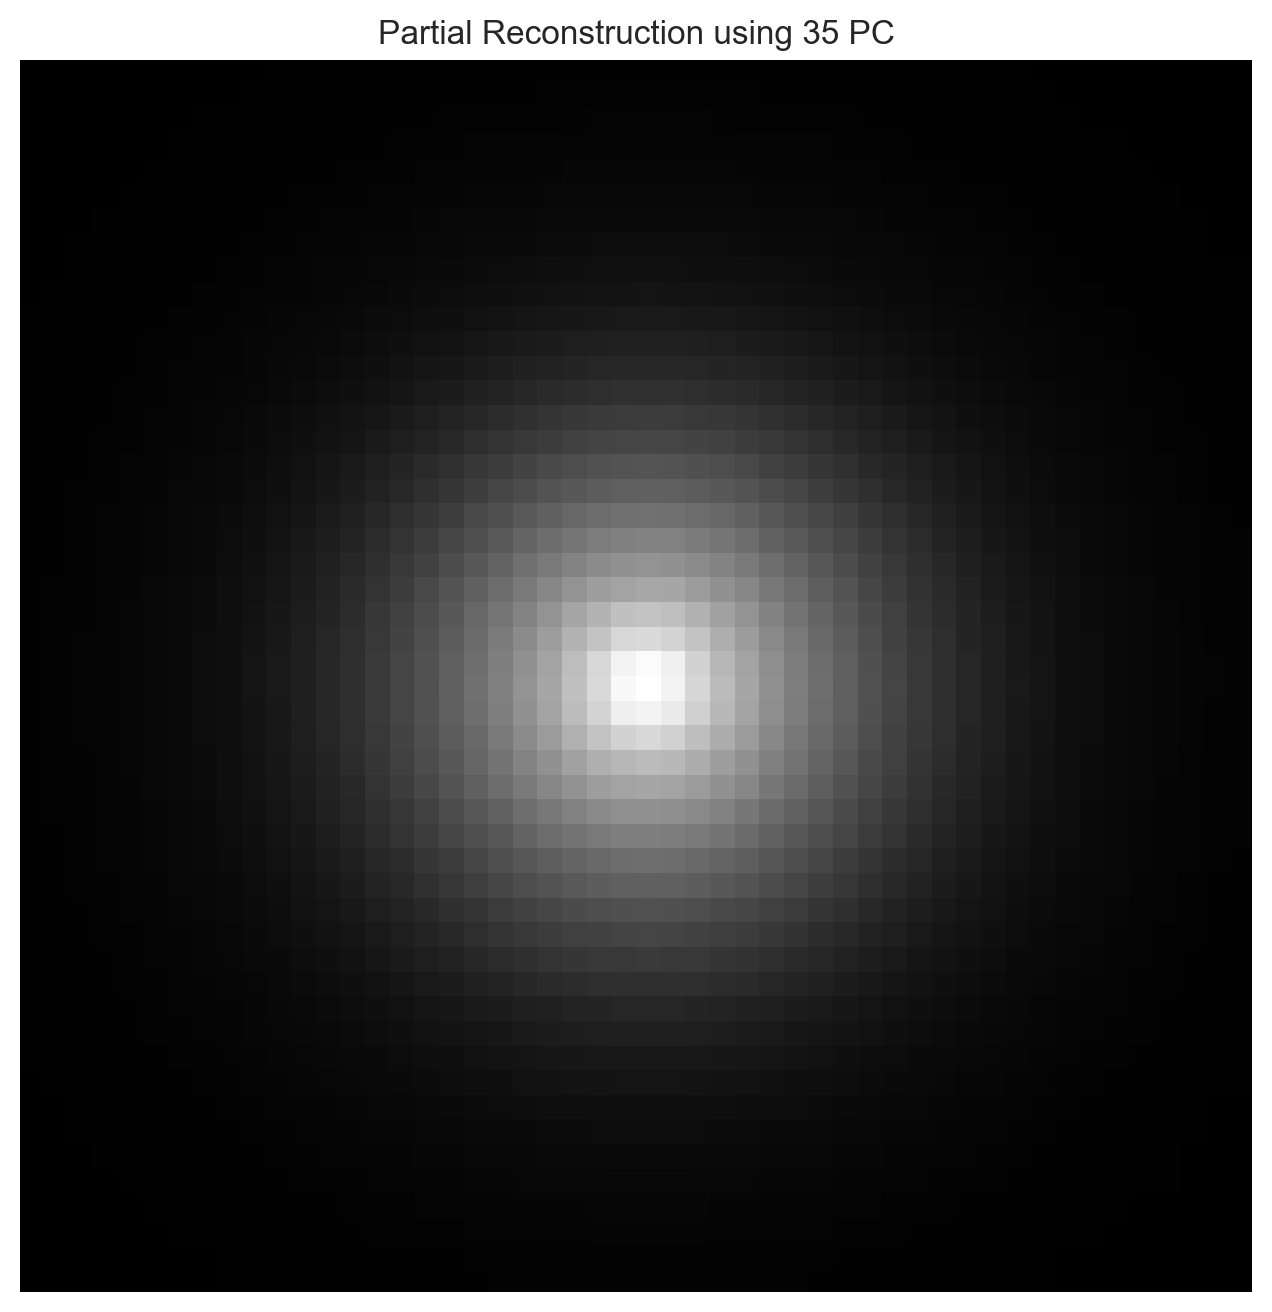

In [152]:
view_column(x.to_numpy(), "Partial Reconstruction using 35 PC")